# Practica 2 Ingenieria de Caracteristica

Se hace la carga de las librerías para los diferentes procesos de la base de datos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from janitor import clean_names
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
pt = PowerTransformer(standardize=True)

Se hace la carga de los datos y una limpieza general de los datos de valoración global
Adicional se deben eliminar las palabras que se encuentran en el dataframe por que daran errores
Y se crean una variable de ID para hacer el merge de los datos mas adelante

In [2]:
df = pd.read_excel('practica2.xlsx')
df = (clean_names(df)
      .dropna(subset = 'valoracion_global'))
df = df.replace(['No uso','no',' ','1o'],np.NaN)
df = df.reset_index(drop=True)
df['id']=df.reset_index().index
df.head()

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,<5_causa,valoracion_global,id
0,8.0,8.0,8.0,8.0,9,8.0,8.0,7.0,8.0,8.0,NaN,9.0,0
1,NaN,10.0,9.0,10.0,10,NaN,8.0,NaN,9.0,9.0,NaN,9.0,1
2,8.0,10.0,7.0,7.0,10,7.0,8.0,8.0,8.0,8.0,NaN,7.0,2
3,9.0,8.0,8.0,9.0,10,10.0,5.0,5.0,7.0,10.0,NaN,9.0,3
4,8.0,9.0,8.0,9.0,9,9.0,NaN,NaN,9.0,9.0,NaN,9.0,4


Con los histogramas se puede visualizar la distribución de las variables numericas donde se observa una carga de los datos con sesgo a la derecha

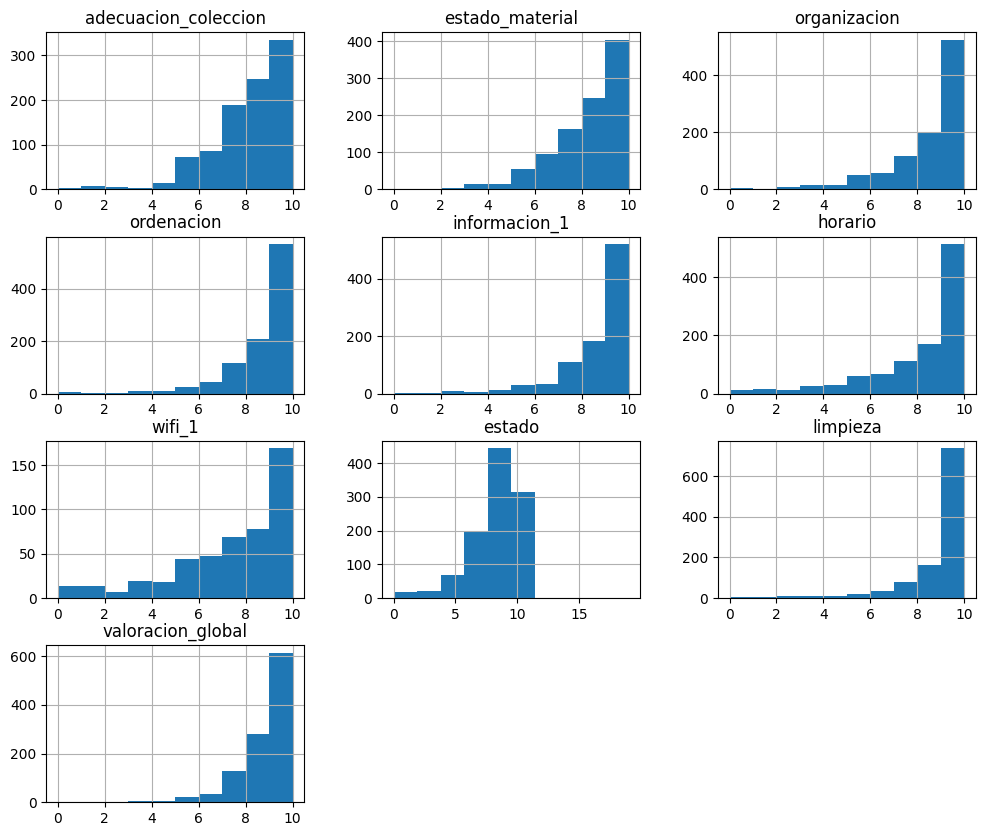

In [3]:
plots = df.drop(['id'],axis = 1).hist(figsize=(12,10))

Se hace la separación de los datos por numericos y la variable de texto con las opiniones escritas

Para los datos numericos se hace la imputación de los mismos mediante la mediana de los mismos y se realiza una descripción de los datos

In [4]:
dfnum = df.drop(['<5_causa'],axis = 1).astype('float')
dfnum[dfnum.columns] = SimpleImputer(strategy='median').fit_transform(dfnum[dfnum.columns])
dfnum.describe()

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,valoracion_global,id
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,7.744758,7.891522,8.231541,8.468551,9.185506,8.538742,7.927985,7.601641,8.139471,8.712853,8.473108,548.000000
std,1.660658,1.661086,1.846576,1.652571,1.438997,1.591665,2.264312,1.764129,2.031607,1.729560,1.349999,316.820927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,7.000000,8.000000,9.000000,8.000000,7.000000,8.000000,7.000000,8.000000,8.000000,274.000000
50%,8.000000,8.000000,9.000000,9.000000,10.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,548.000000
75%,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,9.000000,822.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,10.000000,10.000000,1096.000000


Para la transformación de los datos se utiliza una tranformación de potencia

In [5]:
pw = PowerTransformer(method='yeo-johnson')
dfnum[dfnum.columns.difference(['id','valoracion_global'])] = pw.fit_transform(dfnum[dfnum.columns.difference(['id','valoracion_global'])])
dfnum

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,valoracion_global,id
0,0.037279,-0.072756,-0.397804,-0.586679,-0.640905,-0.666652,-0.201810,-0.654844,-0.217617,-0.836139,9.0,0.0
1,0.037279,1.517583,0.331286,1.224834,0.756325,0.145962,-0.201810,0.090402,0.376508,-0.064324,9.0,1.0
2,0.037279,1.517583,-0.968633,-1.184006,0.756325,-1.257874,-0.201810,0.090402,-0.217617,-0.836139,7.0,2.0
3,0.793687,-0.072756,-0.397804,0.204909,0.756325,1.227960,-1.469851,-1.690133,-0.743607,0.996407,9.0,3.0
4,0.037279,0.664564,-0.397804,0.204909,-0.640905,0.145962,0.418993,0.090402,0.376508,-0.064324,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.659053,0.664564,1.240011,1.224834,-1.419108,1.227960,-0.718332,0.090402,1.039456,0.996407,8.0,1092.0
1093,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,-0.718332,0.090402,0.376508,-0.064324,7.0,1093.0
1094,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,0.418993,0.090402,0.376508,-0.064324,8.0,1094.0
1095,-1.164536,-1.646728,-0.397804,-0.586679,-2.021212,-1.257874,-1.138317,-2.239119,0.376508,-2.229662,5.0,1095.0


Tras la transformación se observan los datos del siguiente modo

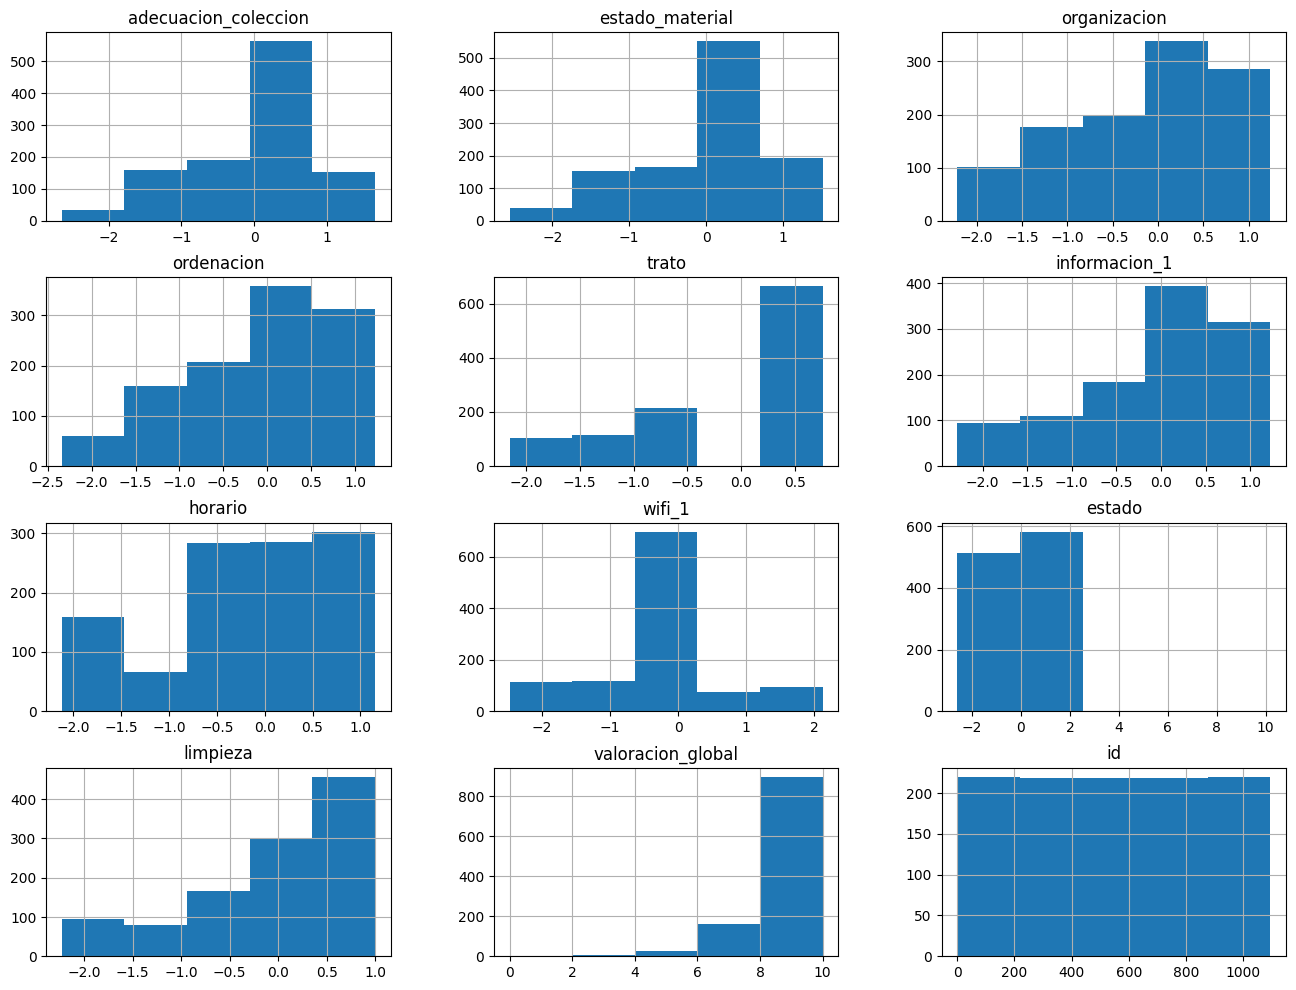

In [6]:
plots = dfnum.hist(figsize = (16,12),bins = 5)

Para los datos de texto se hace la separación y se filtran los datos que están vacíos para realizar un Vector TFIDF

In [7]:
dfCat = df[['<5_causa']].astype('string')
dfCat['id'] = df['id']
dfCat = dfCat.dropna()
dfCat.head()

,<5_causa,id
5,Hace mucho calor en la sala de lectura y entra...,5
7,Unos días hace mucho frio y no se puede estar ...,7
8,Cuando ponen la calefación hace mucho calor y ...,8
10,"Hace demasiado calor en invierno y verano, imp...",10
16,Temperatura en la sala de estudio excesivament...,16


Se utiliza un Bigrama, se eliminan las stop words en español y se toman las palabras que almenos se repitan dos veces

In [8]:
vectorizer = TfidfVectorizer(
      lowercase=True,
      stop_words=stopwords.words("spanish"),
      min_df=2,
      ngram_range=(2, 2))
vectorizer

TfidfVectorizer(min_df=2, ngram_range=(2, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [9]:
vectorizer.fit(dfCat['<5_causa'])
X = vectorizer.transform(dfCat['<5_causa'])

In [10]:
tfidf = pd.DataFrame(data = X.toarray(),
                     columns=vectorizer.get_feature_names_out(),
                     index=dfCat['id'])
tfidf.head()


,abrigo puesto,abrir ventanas,acondicionado hace,aire acondicionado,biblioteca pequeña,biblioteca podría,buscar libros,calefacción aire,calefacción alta,calefacción refrigeración,...,sala infantil,sala lectura,servicio autopréstamo,sistema calefacción,sistema refrigeración,temperatura sala,varias veces,ventanas abiertas,ventilación natural,wifi falla
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.431652,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.589566,0.479921,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
16,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.799679,0.0,0.0,0.0,0.0


Con la matriz se valida cuales son los datos que presentan el 80% de la variabilidad de las 65 palabras iniciales se actualizan a 43 para el dataframe fianal

In [11]:
saved = pd.DataFrame(tfidf.sum(axis=0),columns=['sum']).sort_values(by = 'sum',ascending=False)
cs = saved['sum'].cumsum()
csplot = cs.loc[cs < saved['sum'].sum()*0.80]
final_words = list(csplot.index)
final_words.append('id')


Con las palabras finales se filtra la matriz para solo tener una matriz de 43 palabras

In [12]:
tfidf = tfidf[tfidf.columns.intersection(final_words)]

Con la información final se unen los dataframes para realizar el arbol

In [13]:
finaldf = dfnum.copy()
finaldf = finaldf.merge(tfidf,"left",on='id')
finaldf = finaldf.drop(['id'],axis=1)
finaldf = finaldf.fillna(0)

In [14]:
finaldf

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,...,podría mejorar,préstamo intercentros,puesto aire,red wifi,sala estudio,sala lectura,servicio autopréstamo,sistema refrigeración,varias veces,wifi falla
0,0.037279,-0.072756,-0.397804,-0.586679,-0.640905,-0.666652,-0.201810,-0.654844,-0.217617,-0.836139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.037279,1.517583,0.331286,1.224834,0.756325,0.145962,-0.201810,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.037279,1.517583,-0.968633,-1.184006,0.756325,-1.257874,-0.201810,0.090402,-0.217617,-0.836139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.793687,-0.072756,-0.397804,0.204909,0.756325,1.227960,-1.469851,-1.690133,-0.743607,0.996407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.037279,0.664564,-0.397804,0.204909,-0.640905,0.145962,0.418993,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1.659053,0.664564,1.240011,1.224834,-1.419108,1.227960,-0.718332,0.090402,1.039456,0.996407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1093,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,-0.718332,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,0.037279,-0.072756,0.331286,0.204909,0.756325,0.145962,0.418993,0.090402,0.376508,-0.064324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,-1.164536,-1.646728,-0.397804,-0.586679,-2.021212,-1.257874,-1.138317,-2.239119,0.376508,-2.229662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creación del modelo de Arbol de Regresión

Se realiza el split de los datos en test y train

Se hace el ajuste del modelo con los datos obteniendo un arbol con 20 nodos de profundidad


In [15]:
X = finaldf.drop(['valoracion_global'],axis = True)
y = finaldf.valoracion_global
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

Para este modelo se obtiene un indice de $R^2$ del 39.78 %

In [17]:
model.score(X_test,y_test)

0.3603446159502457

Considerando lo anterior se obtienen los factores más importantes con impureza mayor a 0.001

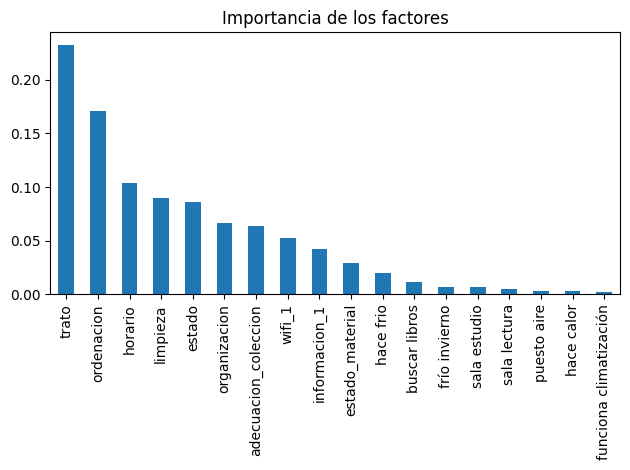

In [18]:
forest_importances=pd.Series(model.feature_importances_,index=model.feature_names_in_)
forest_importances = forest_importances.where(forest_importances >0.001).dropna().sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Importancia de los factores")
fig.tight_layout()

Se presenta un arbol para visualizarlo

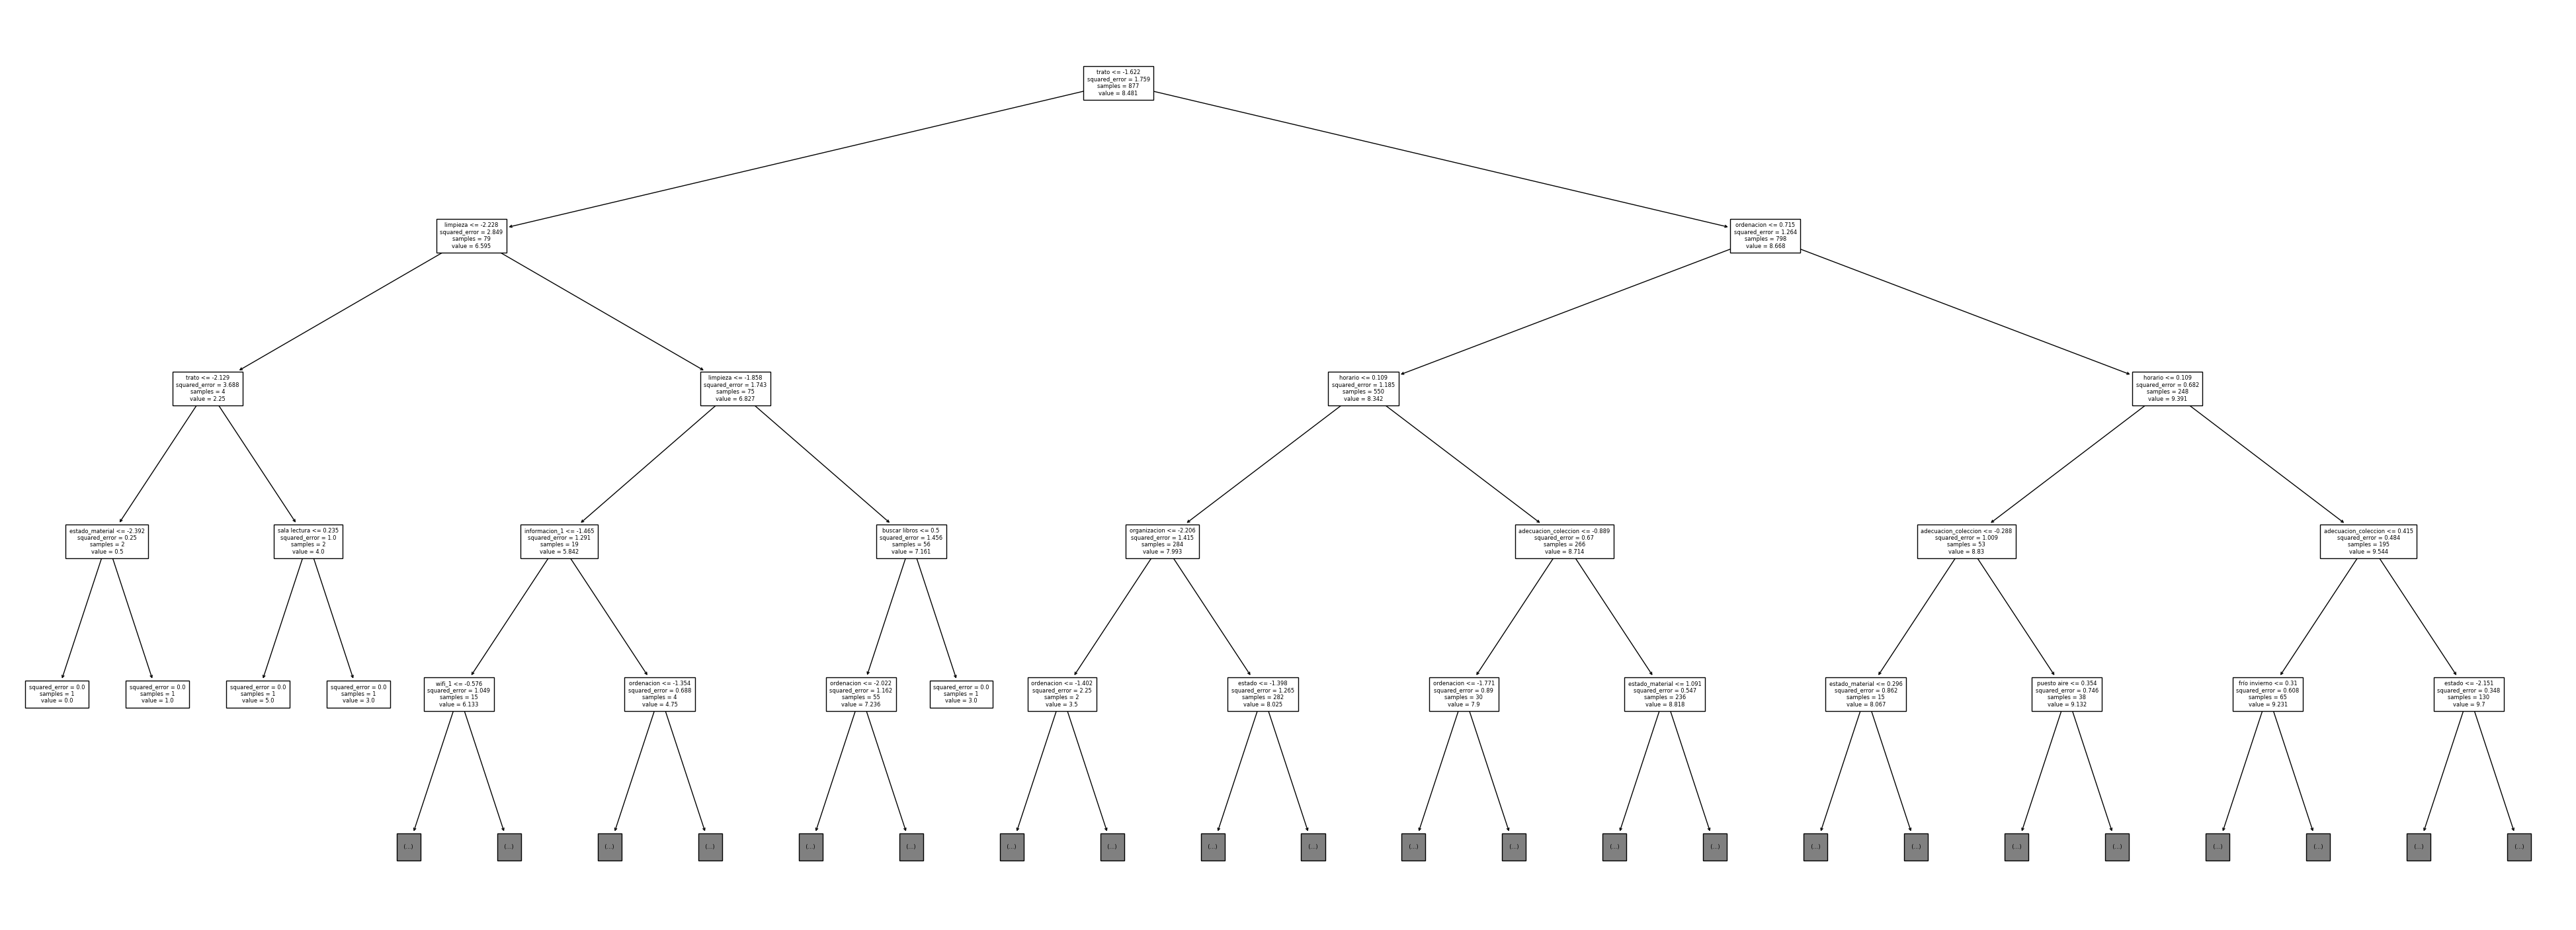

In [19]:
from sklearn import tree
plt.figure(figsize=(50,18))
x = tree.plot_tree(model, fontsize=6,feature_names=X.columns,max_depth=4)


### Optimización de los hiperparametros

Para mejorar lo anterior se hace una optimización de los hiperparametros con los mismos pasos y una validación cruzada

In [20]:
X = finaldf.drop(['valoracion_global'], axis=True)
X = X[forest_importances.index]
y = finaldf.valoracion_global
y = finaldf.valoracion_global
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
modelHyper = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20,30,40,50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split':[20,30,50]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=10, n_jobs=-1, verbose=1, scoring = "r2")


Se encuentran los mejores parametros

In [22]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=20), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [20, 30, 50]},
             scoring='r2', verbose=1)

In [23]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013046,0.012038,0.003013,0.000875,2,5,20,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.169535,0.326932,...,0.304498,0.43667,0.19582,0.061608,0.222331,0.199354,0.38388,0.276632,0.122196,94
1,0.007431,0.005644,0.003212,0.001062,2,5,30,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.169535,0.326932,...,0.304498,0.43667,0.19582,0.061608,0.222331,0.199354,0.38388,0.276632,0.122196,94
2,0.003914,0.001091,0.003467,0.001690,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.169535,0.326932,...,0.304498,0.43667,0.19582,0.061608,0.222331,0.199354,0.38388,0.276632,0.122196,94
3,0.004078,0.000899,0.003222,0.001734,2,10,20,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.199807,0.335975,...,0.304498,0.43667,0.19582,0.149895,0.232415,0.199354,0.40712,0.292724,0.107941,88
4,0.004801,0.001605,0.004027,0.004622,2,10,30,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.199807,0.335975,...,0.304498,0.43667,0.19582,0.149895,0.232415,0.199354,0.40712,0.292724,0.107941,88


### Mejor modelo
El mejor modelo obtenido es de profundidad 5, minimo de muestras por hoja 20 y minimo de muestras antes del split 50

In [24]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=50)

In [25]:
dt_best = grid_search.best_estimator_

Se corre el modelo obteniendo una mejora al 52.8%

In [27]:
ypred = pd.Series(dt_best.predict(X_test))
dt_best.score(X_test,y_test)

0.5279471081894814